In [ ]:
! conda install -c plotly plotly-orca -y
! pip install RISE
! pip install cufflinks
! pip install chart_studio
! pip install plotly


In [1]:
import os
import pandas as pd
import numpy as np
import cufflinks as cf
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import chart_studio.plotly as py
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
df = pd.read_excel('/Users/luke/PycharmProjects/pythonProject2/Technical Interview Dataset.xlsx')
pd.set_option('display.float_format', lambda x: '%.5f' % x)
# df.set_index('Borough', inplace=True)

df.columns
x = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens'] # for use as x axis in graphs



Index(['Borough', 'Quarter (2020)', '# of Restaurants',
       'Total Restaurant Revenue', 'Population', 'Average Resident Salary',
       'Averages Diner's Per Night'],
      dtype='object')

In [3]:
def layout(graph, symbol=''):
    """Summary or Description of the Function

    Parameters:
    graph (plotly graph): graph to be beautified
    symbol (str): to format between $ and % 

    Returns:
    graph object: Beautified graph

   """
    if symbol == '%':
        graph.update_layout(
        font_family="Verdana",
        font_color="White",
        font_size=13,
        title_font_family="Verdana",
        plot_bgcolor= '#eee',
        paper_bgcolor= '#374C60',
        yaxis_tickformat = symbol
        )
    else:
        graph.update_layout(
        font_family="Verdana",
        font_color="White",
        font_size=13,
        title_font_family="Verdana",
        plot_bgcolor= '#eee',
        paper_bgcolor= '#374C60',
        yaxis_tickprefix = symbol,
        )
    return graph

In [142]:
fig6 = px.scatter_matrix(df, dimensions=['Total Restaurant Revenue','# of Restaurants', 'Population', 'Average Resident Salary', "Averages Diner's Per Night"],
                         color='Borough', color_discrete_map={'Bronx': '#686cfc', 'Queens': '#9467bd',
                                                              'Brooklyn': '#f0543c', 'Manhattan': '#08cc94'}, title="Scatter matrix of Borough Features",
    labels={col:col.replace('Average', 'Avg ') for col in df.columns}, width=1100, height=900) # remove underscore )
layout(fig6)
df[0:6].corr()

,Quarter (2020),# of Restaurants,Total Restaurant Revenue,Population,Average Resident Salary,Averages Diner's Per Night,rev_pop
Quarter (2020),1.00000,0.25519,0.41564,0.30364,0.40726,-0.09374,0.51001
# of Restaurants,0.25519,1.00000,0.97872,0.99513,0.98375,0.74486,0.95094
Total Restaurant Revenue,0.41564,0.97872,1.00000,0.99198,0.99924,0.73235,0.99273
Population,0.30364,0.99513,0.99198,1.00000,0.99377,0.75816,0.97048
Average Resident Salary,0.40726,0.98375,0.99924,0.99377,1.00000,0.71848,0.98956
Averages Diner's Per Night,-0.09374,0.74486,0.73235,0.75816,0.71848,1.00000,0.70237
rev_pop,0.51001,0.95094,0.99273,0.97048,0.98956,0.70237,1.00000


In [141]:

# df.iloc[:4, 2:].describe() # Manhattan
# df.iloc[4:8, 2:].describe() # Queens
# df.iloc[8:12, 2:].describe() # Bronx
# df.iloc[12:16, 2:].describe() # Brooklyn


In [9]:
# Revenue per # of people, not diners
df['rev_pop'] = df['Total Restaurant Revenue'] / df['Population']
rev_pop2 = df.groupby('Borough')['rev_pop'].mean().round()
# group by quarter for each borough
print(rev_pop2)

fig1 = px.bar(x=x, y=rev_pop2, labels={'x': 'Borough', 'y':'Revenue per Person'},
               color=x, title='Revenue Per Person')
layout(fig1, '$')

Borough
Bronx       14.00000
Brooklyn    22.00000
Manhattan   19.00000
Queens       9.00000
Name: rev_pop, dtype: float64


In [153]:
# Consumers calculated by # of restaurants * people who visit each restaurant per night
df['rev_consumer'] = df['Total Restaurant Revenue'] / (df['# of Restaurants'] * df['Averages Diner\'s Per Night'])
rev_consumer2 = df.groupby('Borough')['rev_consumer'].mean().round()
rev_consumer2
fig8 = px.bar(x=x, y=rev_consumer2, labels={'x': 'Borough', 'y':'Revenue per Customers'},
              color=x, title='Revenue Per Consumer')
layout(fig8, '$')

Borough
Bronx       131.00000
Brooklyn    352.00000
Manhattan   308.00000
Queens      303.00000
Name: rev_consumer, dtype: float64

In [15]:
# Revenue per Restaurant
df['rev_num_rest'] = df['Total Restaurant Revenue'] / df['# of Restaurants']
rev_num_rest2 = df.groupby('Borough')['rev_num_rest'].mean().round()
rev_num_rest2

fig2 = px.bar(x=x, y=rev_num_rest2, labels={'x': 'Borough', 'y':'Revenue per Restaurant'},
              color=x, title='Revenue Per Restaurant')
layout(fig2, '$')

Borough
Bronx        7550.00000
Brooklyn    25262.00000
Manhattan   23443.00000
Queens      10876.00000
Name: rev_num_rest, dtype: float64

In [16]:
# % of nightly diners out of population
df['pop_num_diners'] = (df["Averages Diner's Per Night"] * df['# of Restaurants']) / df['Population'] 
pop_num_diners2 = df.groupby('Borough')['pop_num_diners'].mean().round(4)
pop_num_diners2

fig3 = px.bar(x=x, y=pop_num_diners2, labels={'x': 'Borough', 'y':'% of Population who Dines'},
            color=x, title='% of Population who Dines')
layout(fig3, '%')


Borough
Bronx       0.10700
Brooklyn    0.06450
Manhattan   0.06490
Queens      0.03460
Name: pop_num_diners, dtype: float64

In [17]:
# how much each person spends on food at restaurants divided by average salary
DAYS_IN_QUARTER = 91.25 # CONSTANT to indicate how many days are in each quarter
df['spending_per_diner'] = (df['Total Restaurant Revenue'] / ( df["Averages Diner's Per Night"] * DAYS_IN_QUARTER )) / df['Average Resident Salary'] 
spending_per_diner2 = df.groupby('Borough')['spending_per_diner'].mean().round(4)
spending_per_diner2

fig4 = px.bar(x=x, y=spending_per_diner2, labels={'x': 'Borough', 'y':'% of Salary Spent on Food'},
             color=x, title='Spending on Food from Salary')
layout(fig4, '%')

Borough
Bronx       0.08820
Brooklyn    0.15280
Manhattan   0.13800
Queens      0.14850
Name: spending_per_diner, dtype: float64

In [20]:
# How many restaurants a person can chocie between, lower is better for our business
df['consumer_choice'] = df['# of Restaurants'] / df['Population']
consumer_choice2 = df.groupby('Borough')['consumer_choice'].mean()
consumer_choice2

fig5 = px.bar(x=x, y=consumer_choice2, labels={'x': 'Borough', 'y':'Restaurants'},
              color=x, title='Restaurants Per Person')
layout(fig5)

Borough
Bronx       0.00183
Brooklyn    0.00089
Manhattan   0.00083
Queens      0.00082
Name: consumer_choice, dtype: float64

In [8]:
# Compute percent change across whole year
df['diner_pct2'] = df.groupby(['Borough'])['Averages Diner\'s Per Night'].pct_change(periods=3).round(3)
# Computes Percent change across individual quarters
df['diner_pct'] = df.groupby(['Borough'])['Averages Diner\'s Per Night'].pct_change(periods=1).round(3)
# cumsum() adds/subtracts change between quarters
df['diner_pct']= df.groupby(['Borough'])['diner_pct'].cumsum()
# replace null values generated by pctchange with the individual quarter values calculated above
df['diner_pct2'][df['diner_pct2'].isnull()] = df['diner_pct']

# same process repeated for four other features

df['rev_pct2'] = df.groupby(['Borough'])['Total Restaurant Revenue'].pct_change(periods=3).round(3)
df['rev_pct'] = df.groupby(['Borough'])['Total Restaurant Revenue'].pct_change(periods=1).round(3)
df['rev_pct']= df.groupby(['Borough'])['rev_pct'].cumsum()
df['rev_pct2'][df['rev_pct2'].isnull()] = df['rev_pct']

df['ars_pct2'] = df.groupby(['Borough'])['Average Resident Salary'].pct_change(periods=3).round(3)
df['ars_pct'] = df.groupby(['Borough'])['Average Resident Salary'].pct_change(periods=1).round(3)
df['ars_pct'] = df.groupby(['Borough'])['ars_pct'].cumsum()
df['ars_pct2'][df['ars_pct2'].isnull()] = df['ars_pct']

df['num_pct2'] = df.groupby(['Borough'])['# of Restaurants'].pct_change(periods=3).round(3)
df['num_pct'] = df.groupby(['Borough'])['# of Restaurants'].pct_change(periods=1).round(3)
df['num_pct'] = df.groupby(['Borough'])['num_pct'].cumsum()
df['num_pct2'][df['num_pct2'].isnull()] = df['num_pct']

df.fillna(0, inplace=True) # adding starting 0 for quarter 1

line = px.line(df, x='Quarter (2020)', y='rev_pct2' , color='Borough', color_discrete_map={'Bronx': '#686cfc', 'Queens': '#b064fc',
                                                              'Brooklyn': '#f0543c', 'Manhattan': '#08cc94'}
              ).update_layout( yaxis_title='Total Restaurant Revenue', 
                   title_text='Percent Change on Total Restaurant Revenue',
                      yaxis_tickformat = '%')
line2 = px.line(df, x='Quarter (2020)', y='ars_pct2' , color='Borough', color_discrete_map={'Bronx': '#686cfc', 'Queens': '#b064fc',
                                                              'Brooklyn': '#f0543c', 'Manhattan': '#08cc94'}
               ).update_layout( yaxis_title='Average Resident Salary', title_text='Percent Change on Average Resident Salary',
                               yaxis_tickformat = '%')
line3 = px.line(df, x='Quarter (2020)', y='num_pct2' , color='Borough', color_discrete_map={'Bronx': '#686cfc', 'Queens': '#b064fc',
                                                              'Brooklyn': '#f0543c', 'Manhattan': '#08cc94'}
               ).update_layout( yaxis_title='# of Restaurants',title_text='Percent Change on # of Restaurants',
                               yaxis_tickformat = '%')
line4 = px.line(df, x='Quarter (2020)', y='diner_pct2' , color='Borough', color_discrete_map={'Bronx': '#686cfc', 'Queens': '#b064fc',
                                                              'Brooklyn': '#f0543c', 'Manhattan': '#08cc94'}
               ).update_layout( yaxis_title='Average Diner\'s per Night', title_text='Percent Change on Average Diner\'s per Night',
                               yaxis_tickformat = '%')
layout(line)
layout(line2)
layout(line3)
layout(line4)

LinearRegression()

array([80420264.82905938, 76096040.1150088 , 78585186.26579668,
       82380494.27542499, 21747532.75758789, 22079809.75209153,
       19543797.67287514, 21673282.79449988, 25794820.79775377,
       20697603.39848298, 17089148.69673853, 13343140.99736172,
       62698910.74950138, 64146239.40940037, 63675689.44659825,
       62166433.04181865])

-35881116.20208311

array([-8.56632079e+00, -8.64057001e+03,  2.21332852e+03])

0.9832664298917432

hi 0.9832664298917432 0.9790830373646789


/Users/luke/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=16



<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Total Restaurant Revenue   R-squared:                       0.983
Model:                                  OLS   Adj. R-squared:                  0.979
Method:                       Least Squares   F-statistic:                     235.0
Date:                      Fri, 05 Mar 2021   Prob (F-statistic):           6.39e-11
Time:                              09:55:18   Log-Likelihood:                -263.47
No. Observations:                        16   AIC:                             534.9
Df Residuals:                            12   BIC:                             538.0
Df Model:                                 3                                         
Covariance Type:                  nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -3.588e+07   5.44e+06     -6.592      0.000   -4.77e+07    -2.4e+07
Population                 -8.5663      3.570     -2.400      0.034     -16.345      -0.788
# of Restaurants        -8640.5700   4300.476     -2.009      0.068    -1.8e+04     729.363
Average Resident Salary  2213.3285    271.390      8.156      0.000    1622.020    2804.637
==============================================================================
Omnibus:                        0.170   Durbin-Watson:                   0.909
Prob(Omnibus):                  0.919   Jarque-Bera (JB):                0.201
Skew:                          -0.185   Prob(JB):                        0.905
Kurtosis:                       2.594   Cond. No.                     1.55e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

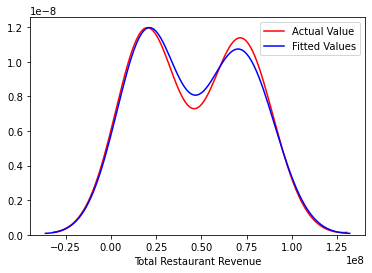

In [14]:
# Multiple Regression to calculate Revenue from factors
# df.head
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
y = df['Total Restaurant Revenue']
X = df[['Population', '# of Restaurants', 'Average Resident Salary']]
model = LinearRegression()
model.fit(X,y)
y_pred = model.predict(X)
y_pred
intercept= model.intercept_
coef = model.coef_
intercept
coef
r2= r2_score(y, y_pred)
r2

X1 = sm.add_constant(X)
result = sm.OLS(y, X1).fit()
#print dir(result)
print ('hi', result.rsquared, result.rsquared_adj)
result.summary()

ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)